In [2]:
from plotnine import *
import pandas as pd


#TASK 1
 1. variables: income, life expectancy, region (by color), size population

In [11]:

# 2.import dataset
q1 = pd.read_csv("C:/Users/Evan/Desktop/GSB 544/Week 1/Data/q1data.csv")

In [10]:
q1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


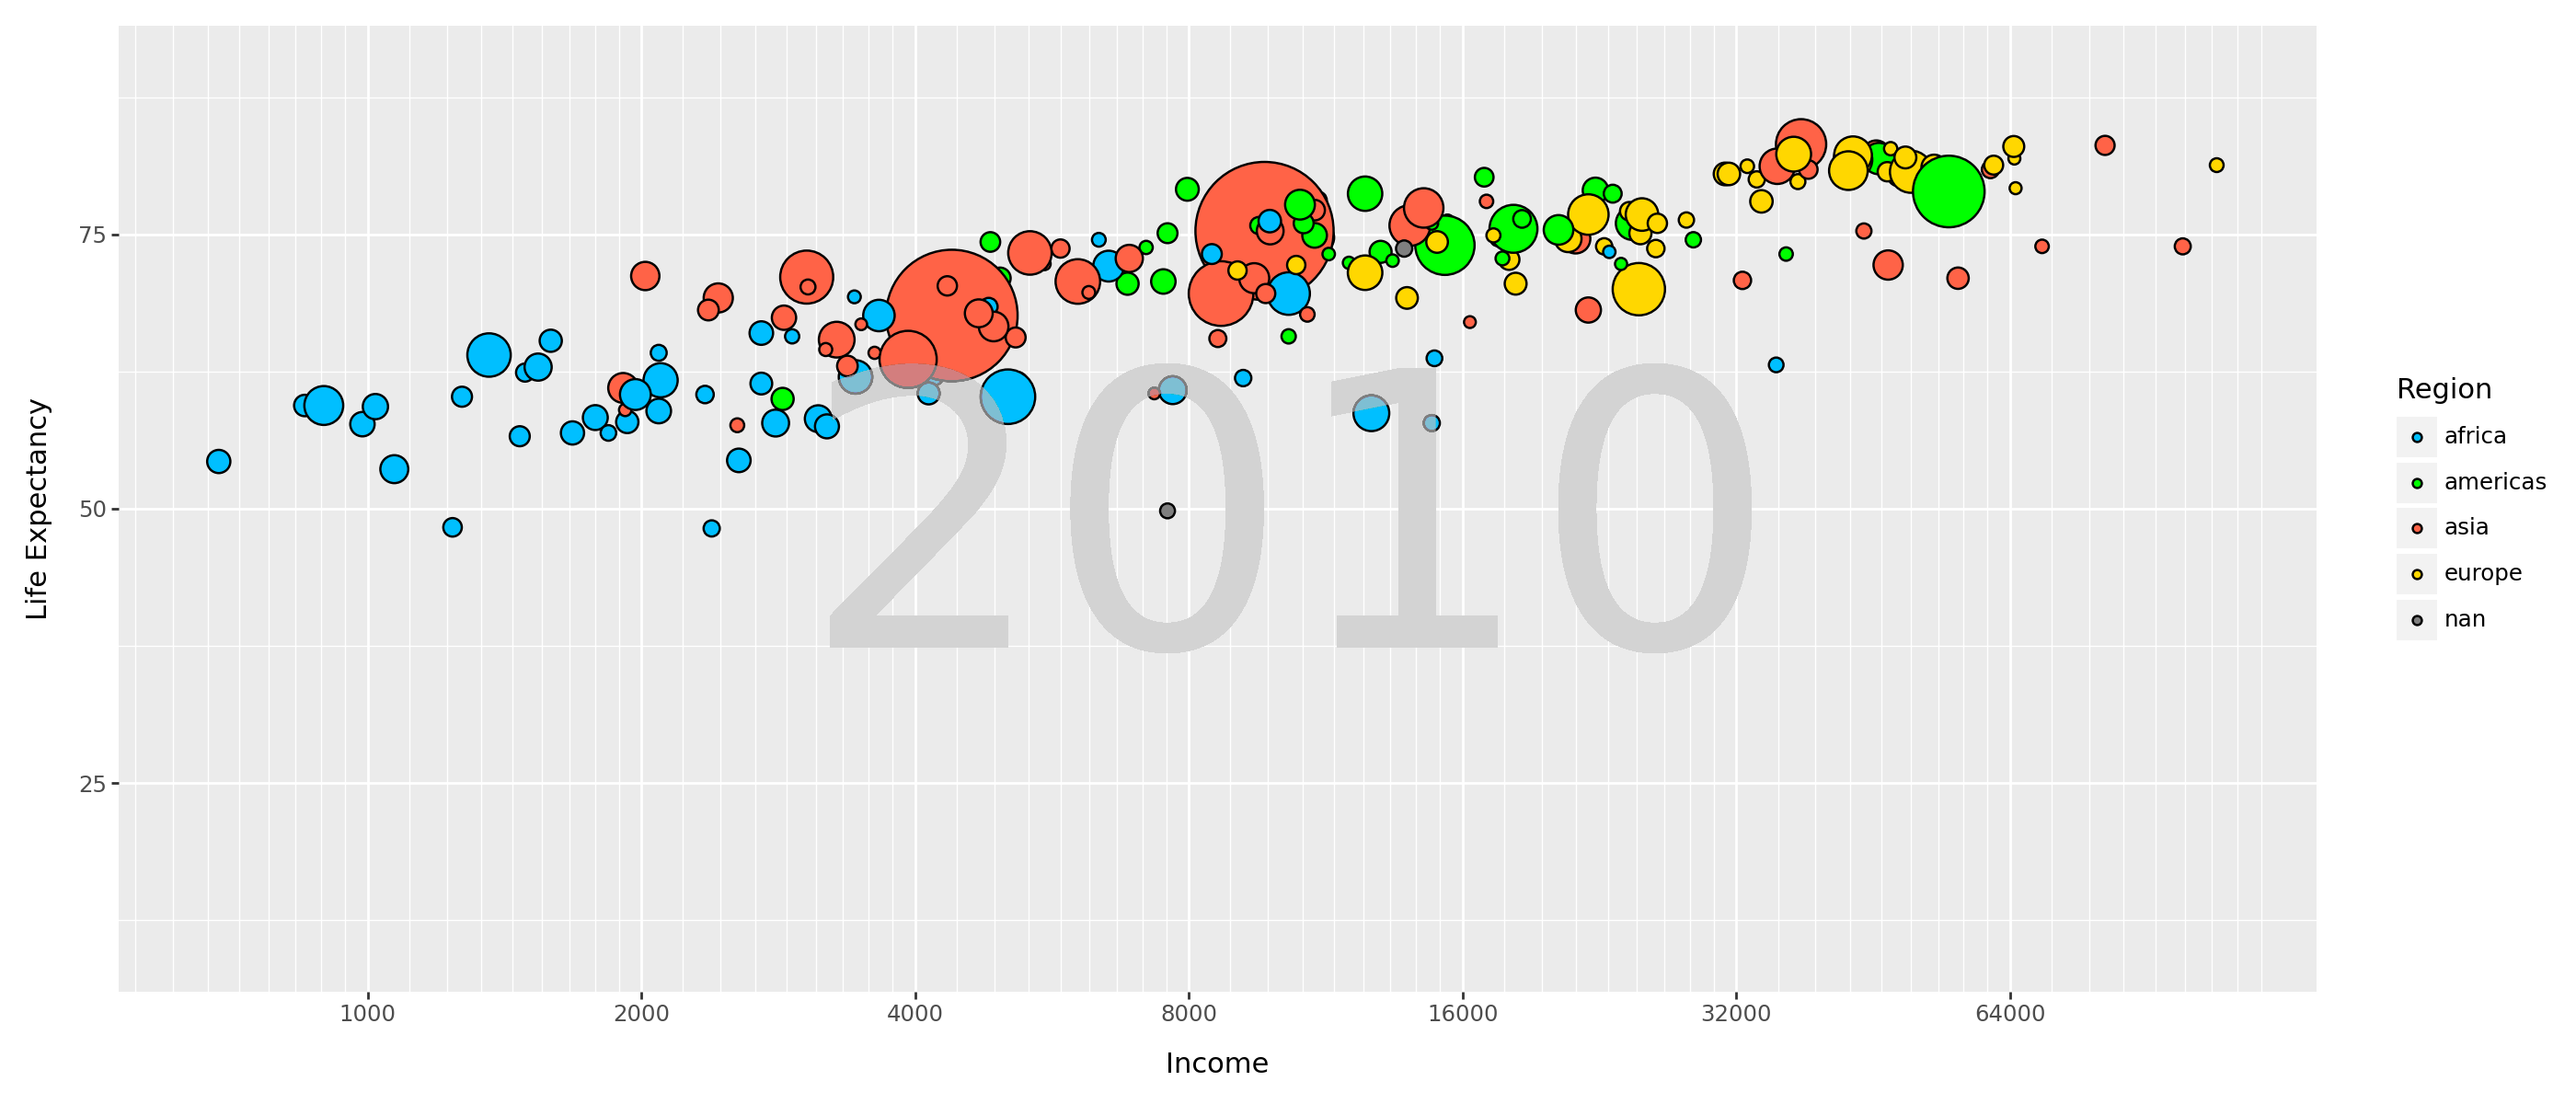

In [63]:
region_color = {'africa':'deepskyblue', 'americas':'lime', 'asia':'tomato', 'europe':'gold'}
(ggplot(q1, aes(x='income', y='life_exp', fill='four_regions', size="population")) + geom_point() + 
scale_x_log10(breaks=[500,1000,2000,4000,8000,16000,32000,64000]) +
ylim(10,90) +
scale_size(range=(2,30)) +
theme(figure_size=(14, 6)) + 
geom_text(aes(x=3000, y = 30, label = "2010"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
guides(size ='none') +
labs(x='Income', y='Life Expectancy', fill='Region')+
scale_fill_manual(values=region_color)
    


)


C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_bin_2d : Removed 2 rows containing non-finite values.


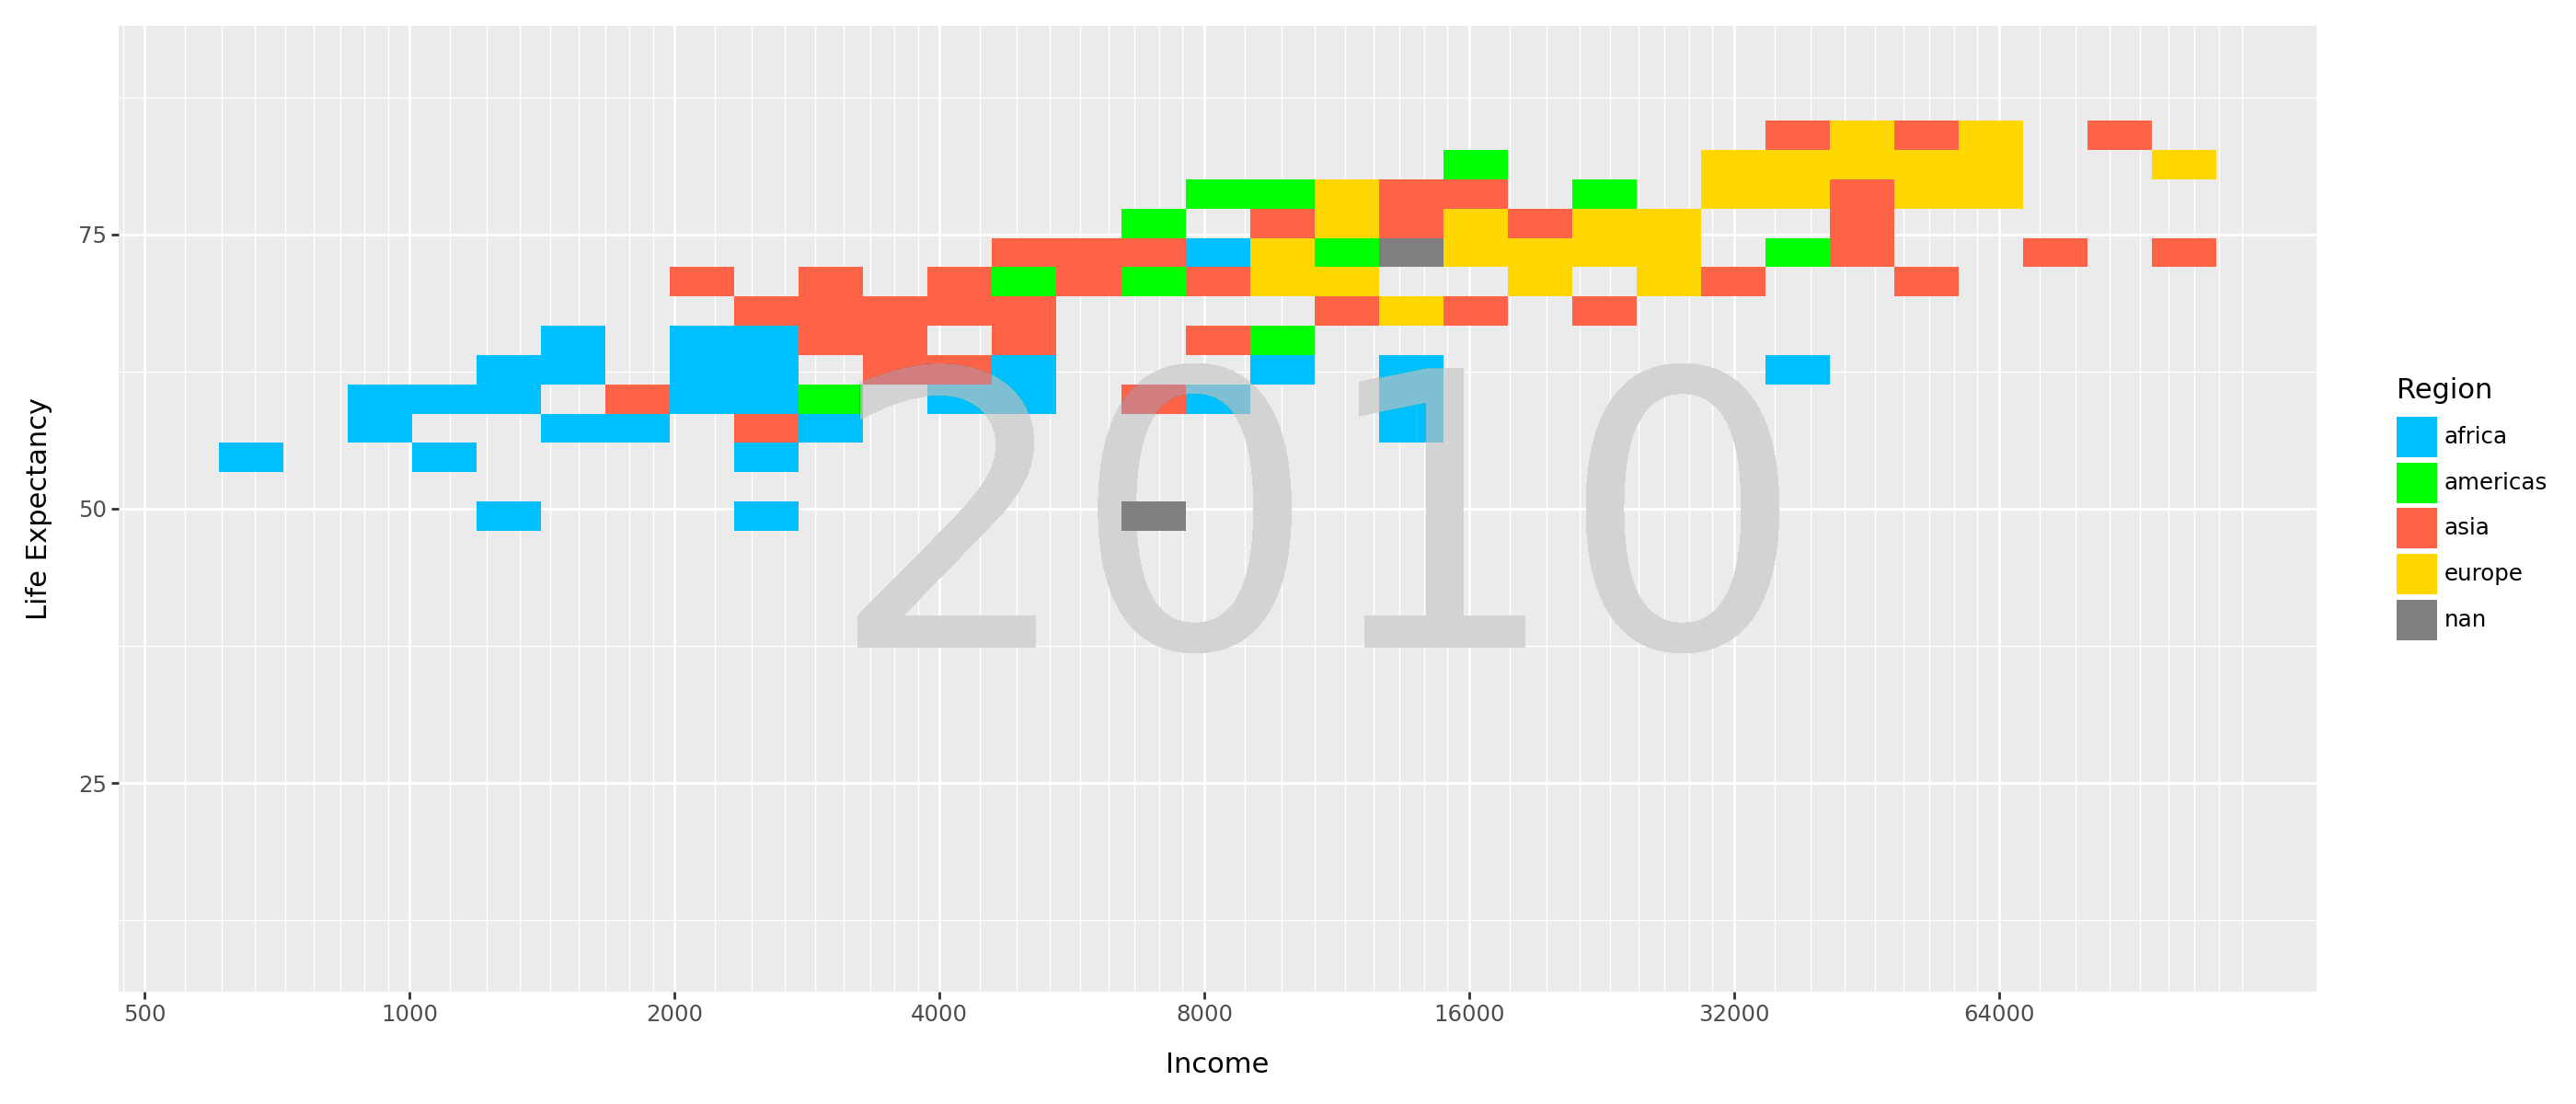

In [28]:
region_color = {'africa':'deepskyblue', 'americas':'lime', 'asia':'tomato', 'europe':'gold'}
(ggplot(q1, aes(x='income', y='life_exp', fill='four_regions', size="population")) + geom_bin_2d() +
scale_x_log10(breaks=[500,1000,2000,4000,8000,16000,32000,64000]) +
ylim(10,90) +
geom_text(aes(x=3000, y = 30, label = "2010"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
labs(x='Income', y='Life Expectancy', fill='Region')+
theme(figure_size=(14, 6))+
scale_fill_manual(values=region_color)
)

The first visualiztion using geom point is objectively batter than that of geom bin. While geom bin retains regions, income, and life exepectancy, you loose the granularity of seeing different countries, country size, and overlap between different regions.

TASK 2
 1. variables: imports, exports, region (by color), size energy

In [29]:

# 2.import dataset
q2 = pd.read_csv("C:/Users/Evan/Desktop/GSB 544/Week 1/Data/q2data.csv")

In [60]:
q2.dtypes

imports              float64
exports              float64
energy                object
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

In [64]:
q2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [30]:
q2['energy'] = q2['energy'].str.replace('k', '', regex=False).astype(float) * 1000
q2["energy"] = q2["energy"].astype(float)

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.


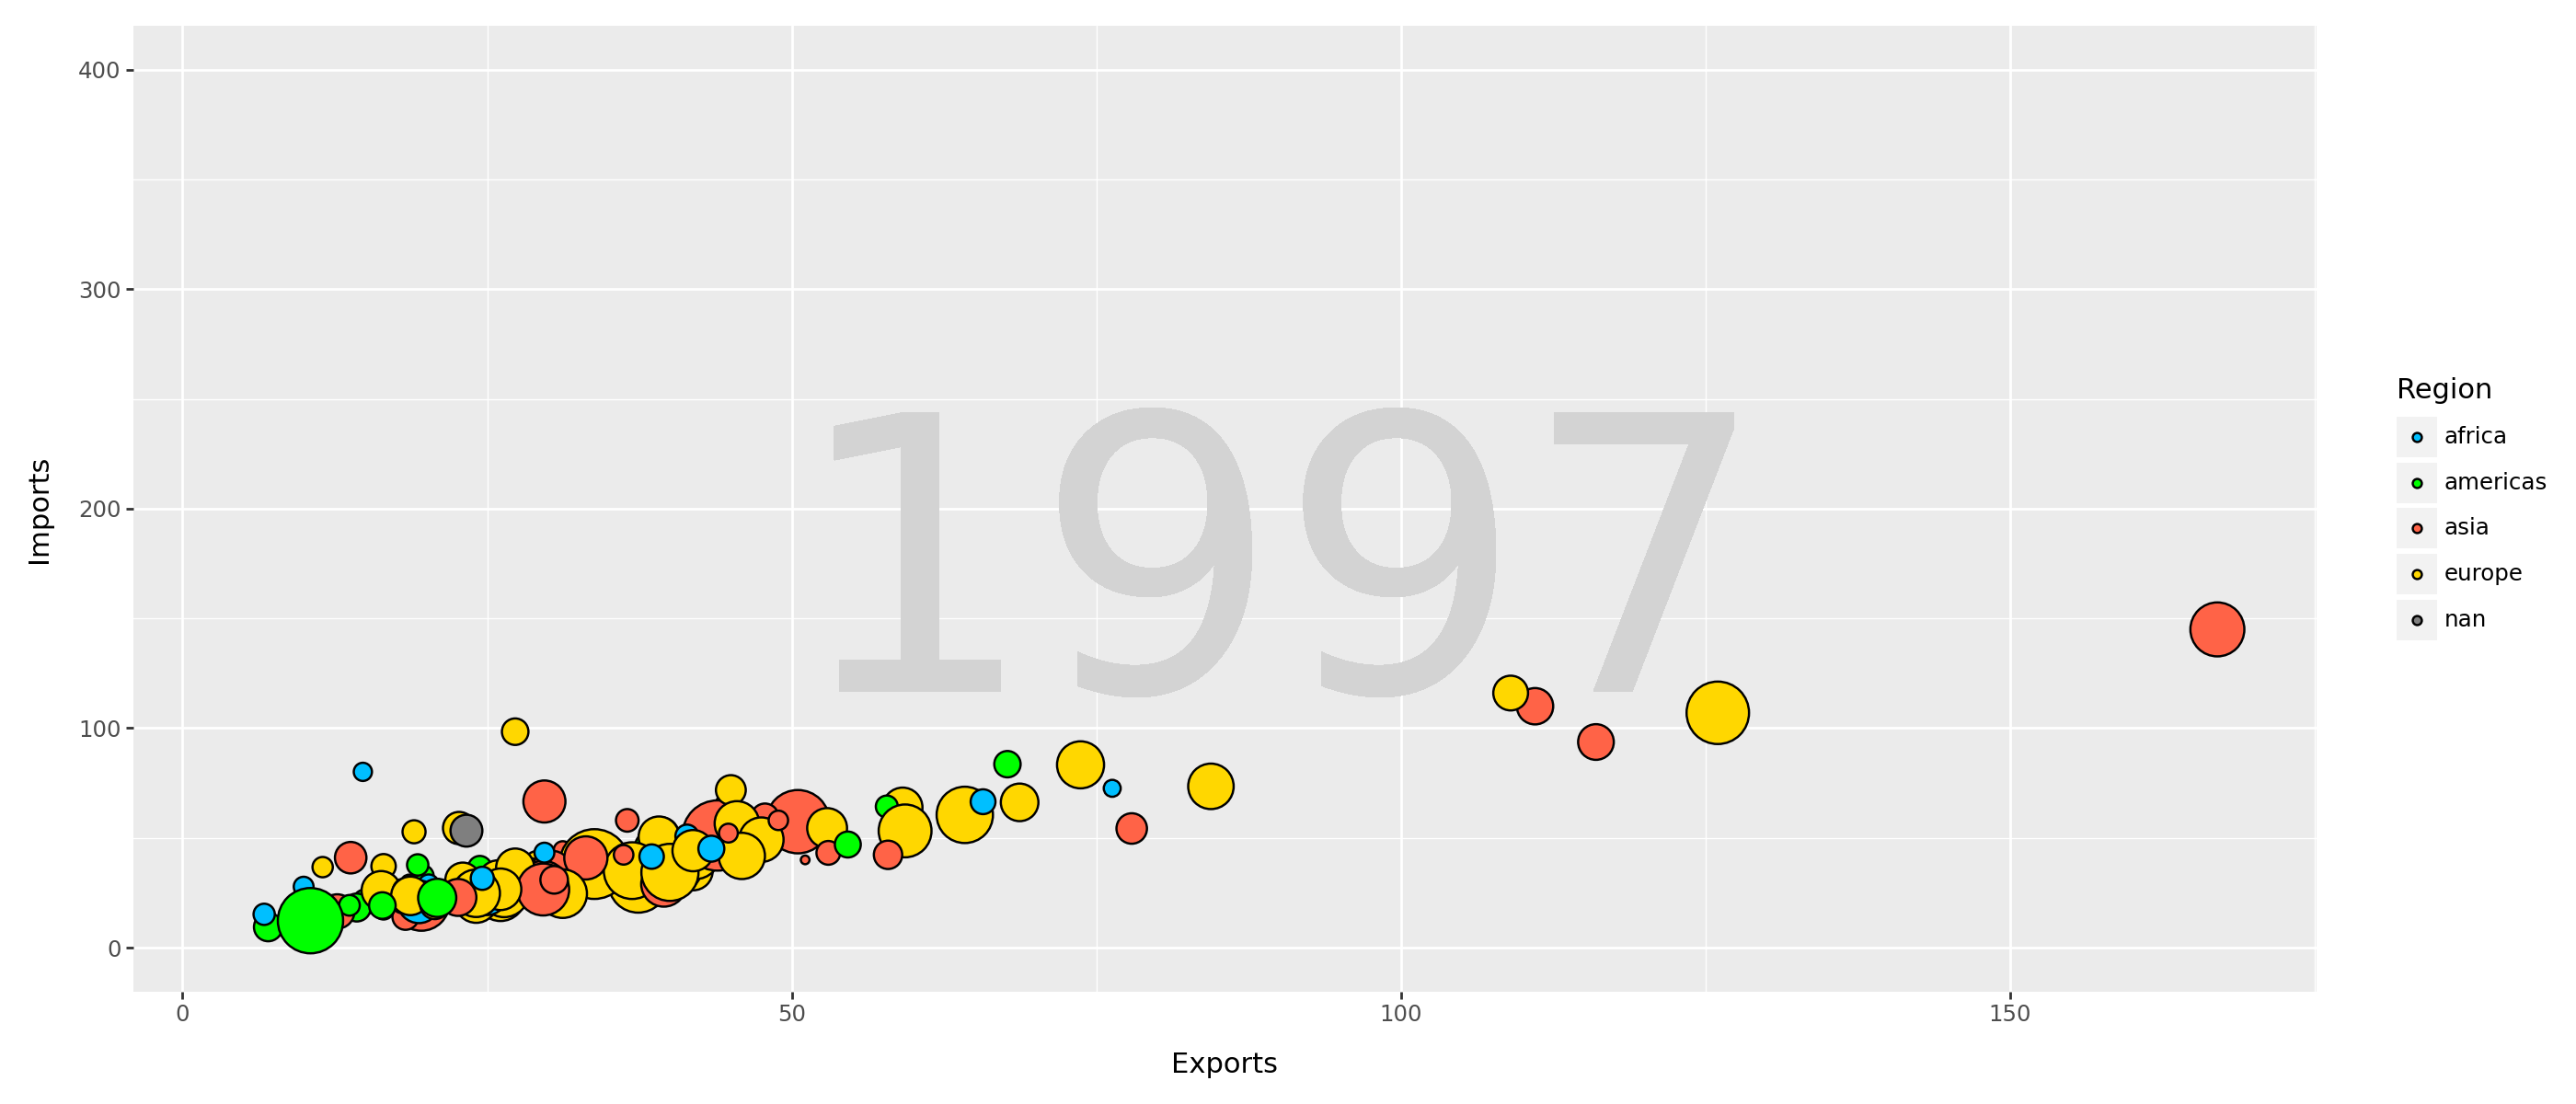

In [41]:
region_color = {'africa':'deepskyblue', 'americas':'lime', 'asia':'tomato', 'europe':'gold'}
(ggplot(q2, aes(x='exports', y='imports', fill='four_regions', size="energy")) + geom_point() +
ylim(0,400) +
scale_size(range=(1,15)) +
geom_text(aes(x=50, y = 80, label = "1997"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
guides(size ='none') +
#scale_y_continuous(breaks=[0, 50, 100, 150, 200, 250, 300, 350, 400])  +
labs(x='Exports', y='Imports', fill='Region')+
scale_fill_manual(values=region_color)+
theme(figure_size=(14, 6))

)

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\stats\smoothers.py:347: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


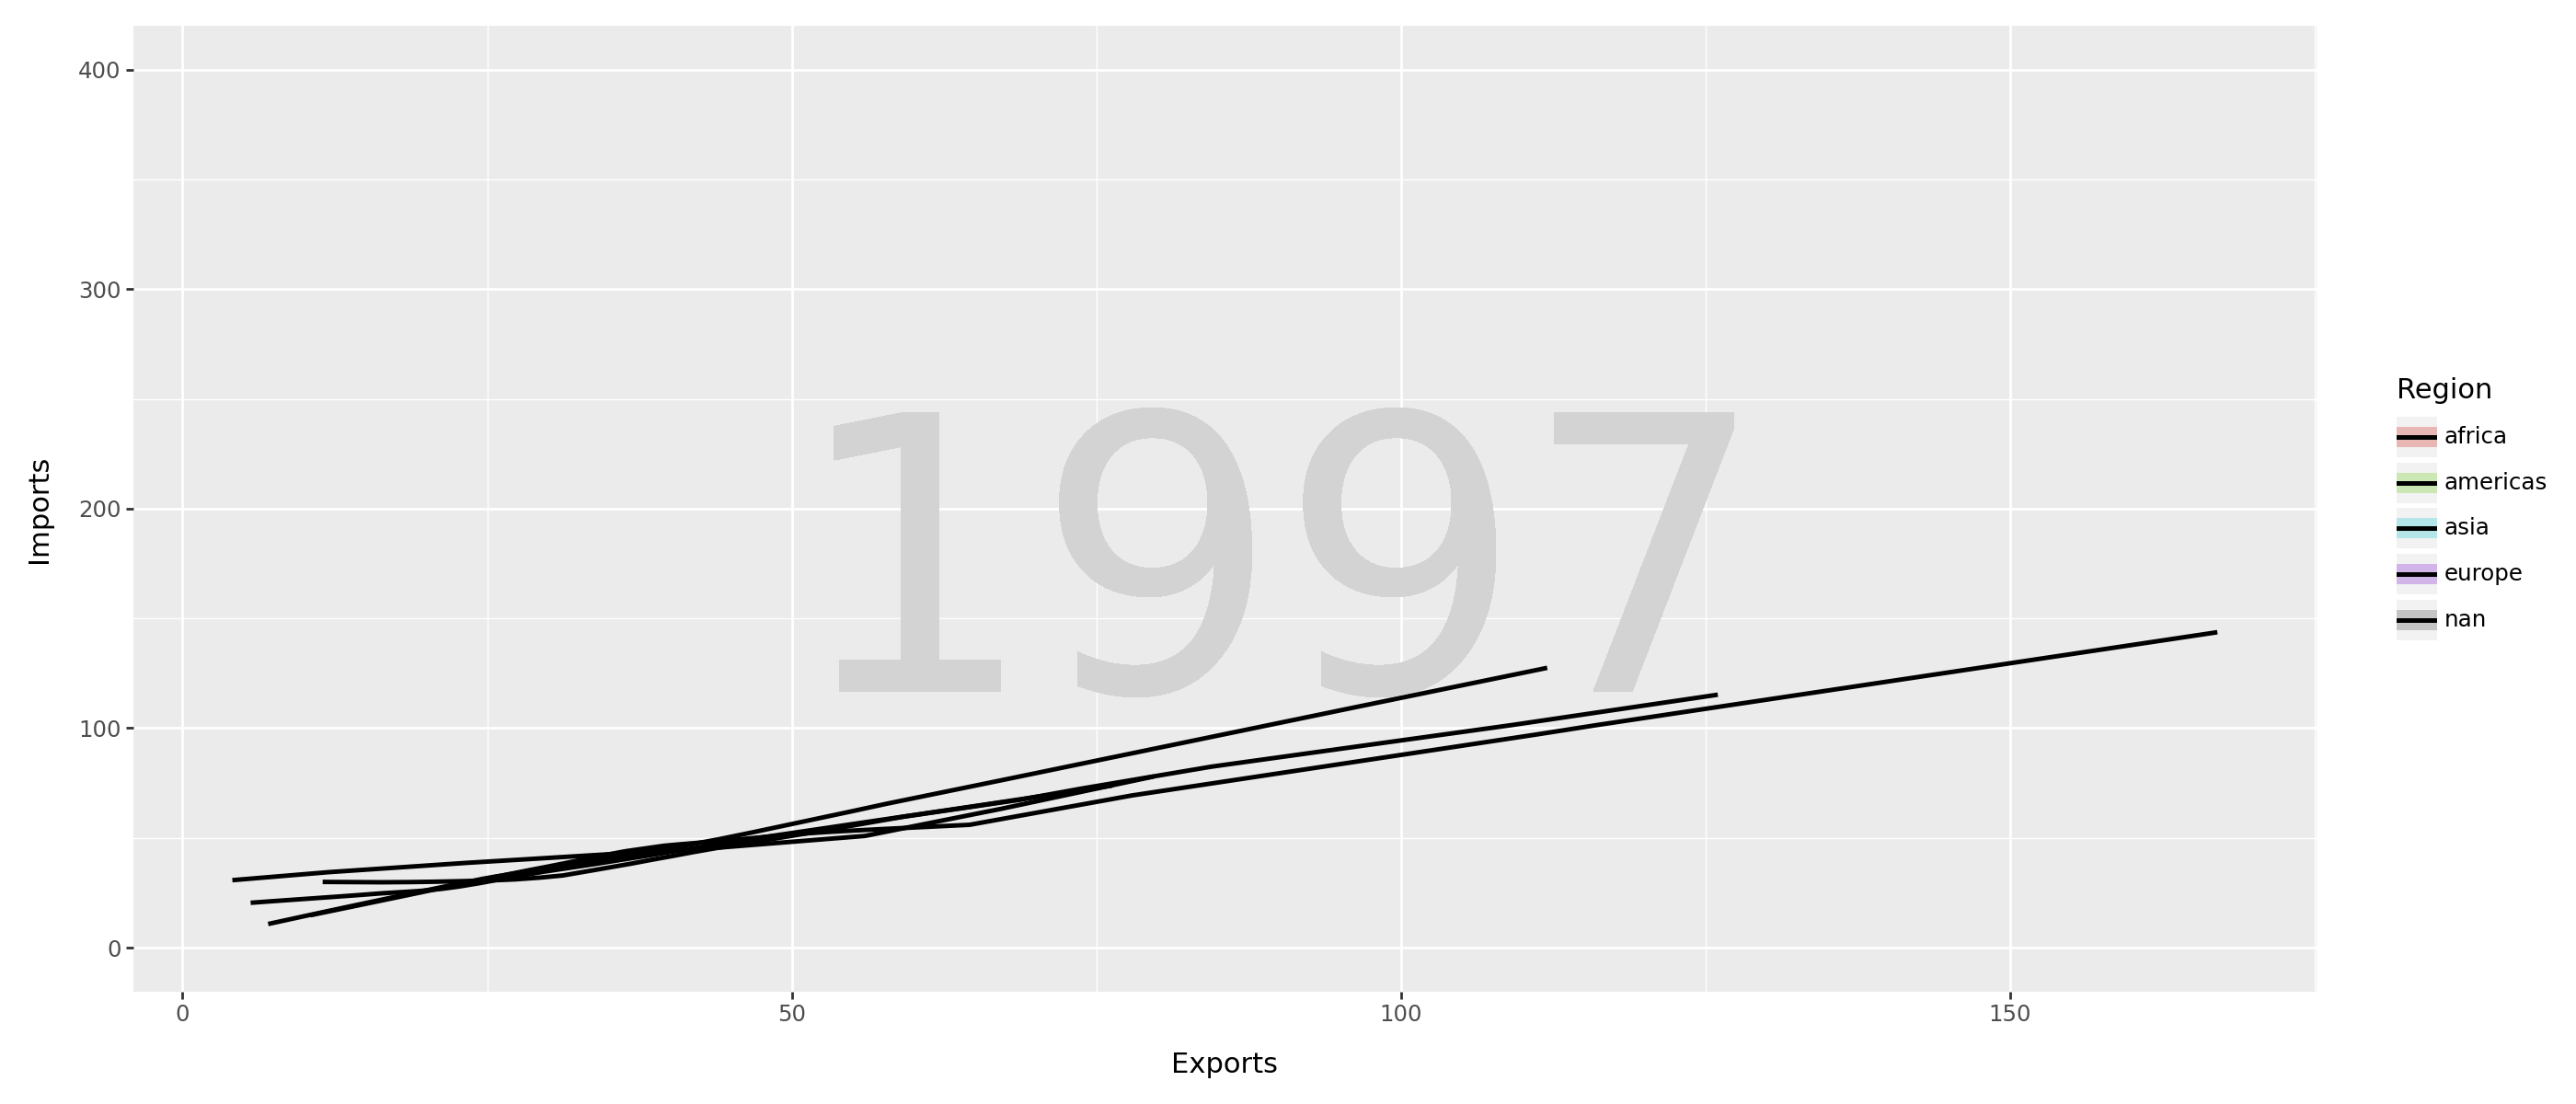

In [48]:
(ggplot(q2, aes(x='exports', y='imports', fill='four_regions', size="energy")) + geom_smooth() +
ylim(0,400) +
guides(size ='none') +
#scale_y_continuous(breaks=[0, 50, 100, 150, 200, 250, 300, 350, 400])  +
labs(x='Exports', y='Imports', fill='Region')+
geom_text(aes(x=50, y = 80, label = "1997"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
theme(figure_size=(14, 6))
)

While this plot technically contains all of the data from the intial model it comes across in a way that is much harder to decipher. It is almost impossible to see where different regions overlap, as well as takes out specific values, and country size. This would work much better if it was only for one region.

TASK 3
 1. variables: indivdiuals using the internet, GDP, region (by color), size income

In [43]:
# 2.import dataset
q3 = pd.read_csv("C:/Users/Evan/Desktop/GSB 544/Week 1/Data/q3data.csv")

In [44]:
q3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [105]:
q3.dtypes

internet_users       float64
gdp                  float64
income               float64
year                   int64
country               object
four_regions          object
six_regions           object
eight_regions         object
world_bank_region     object
dtype: object

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 32 rows containing missing values.


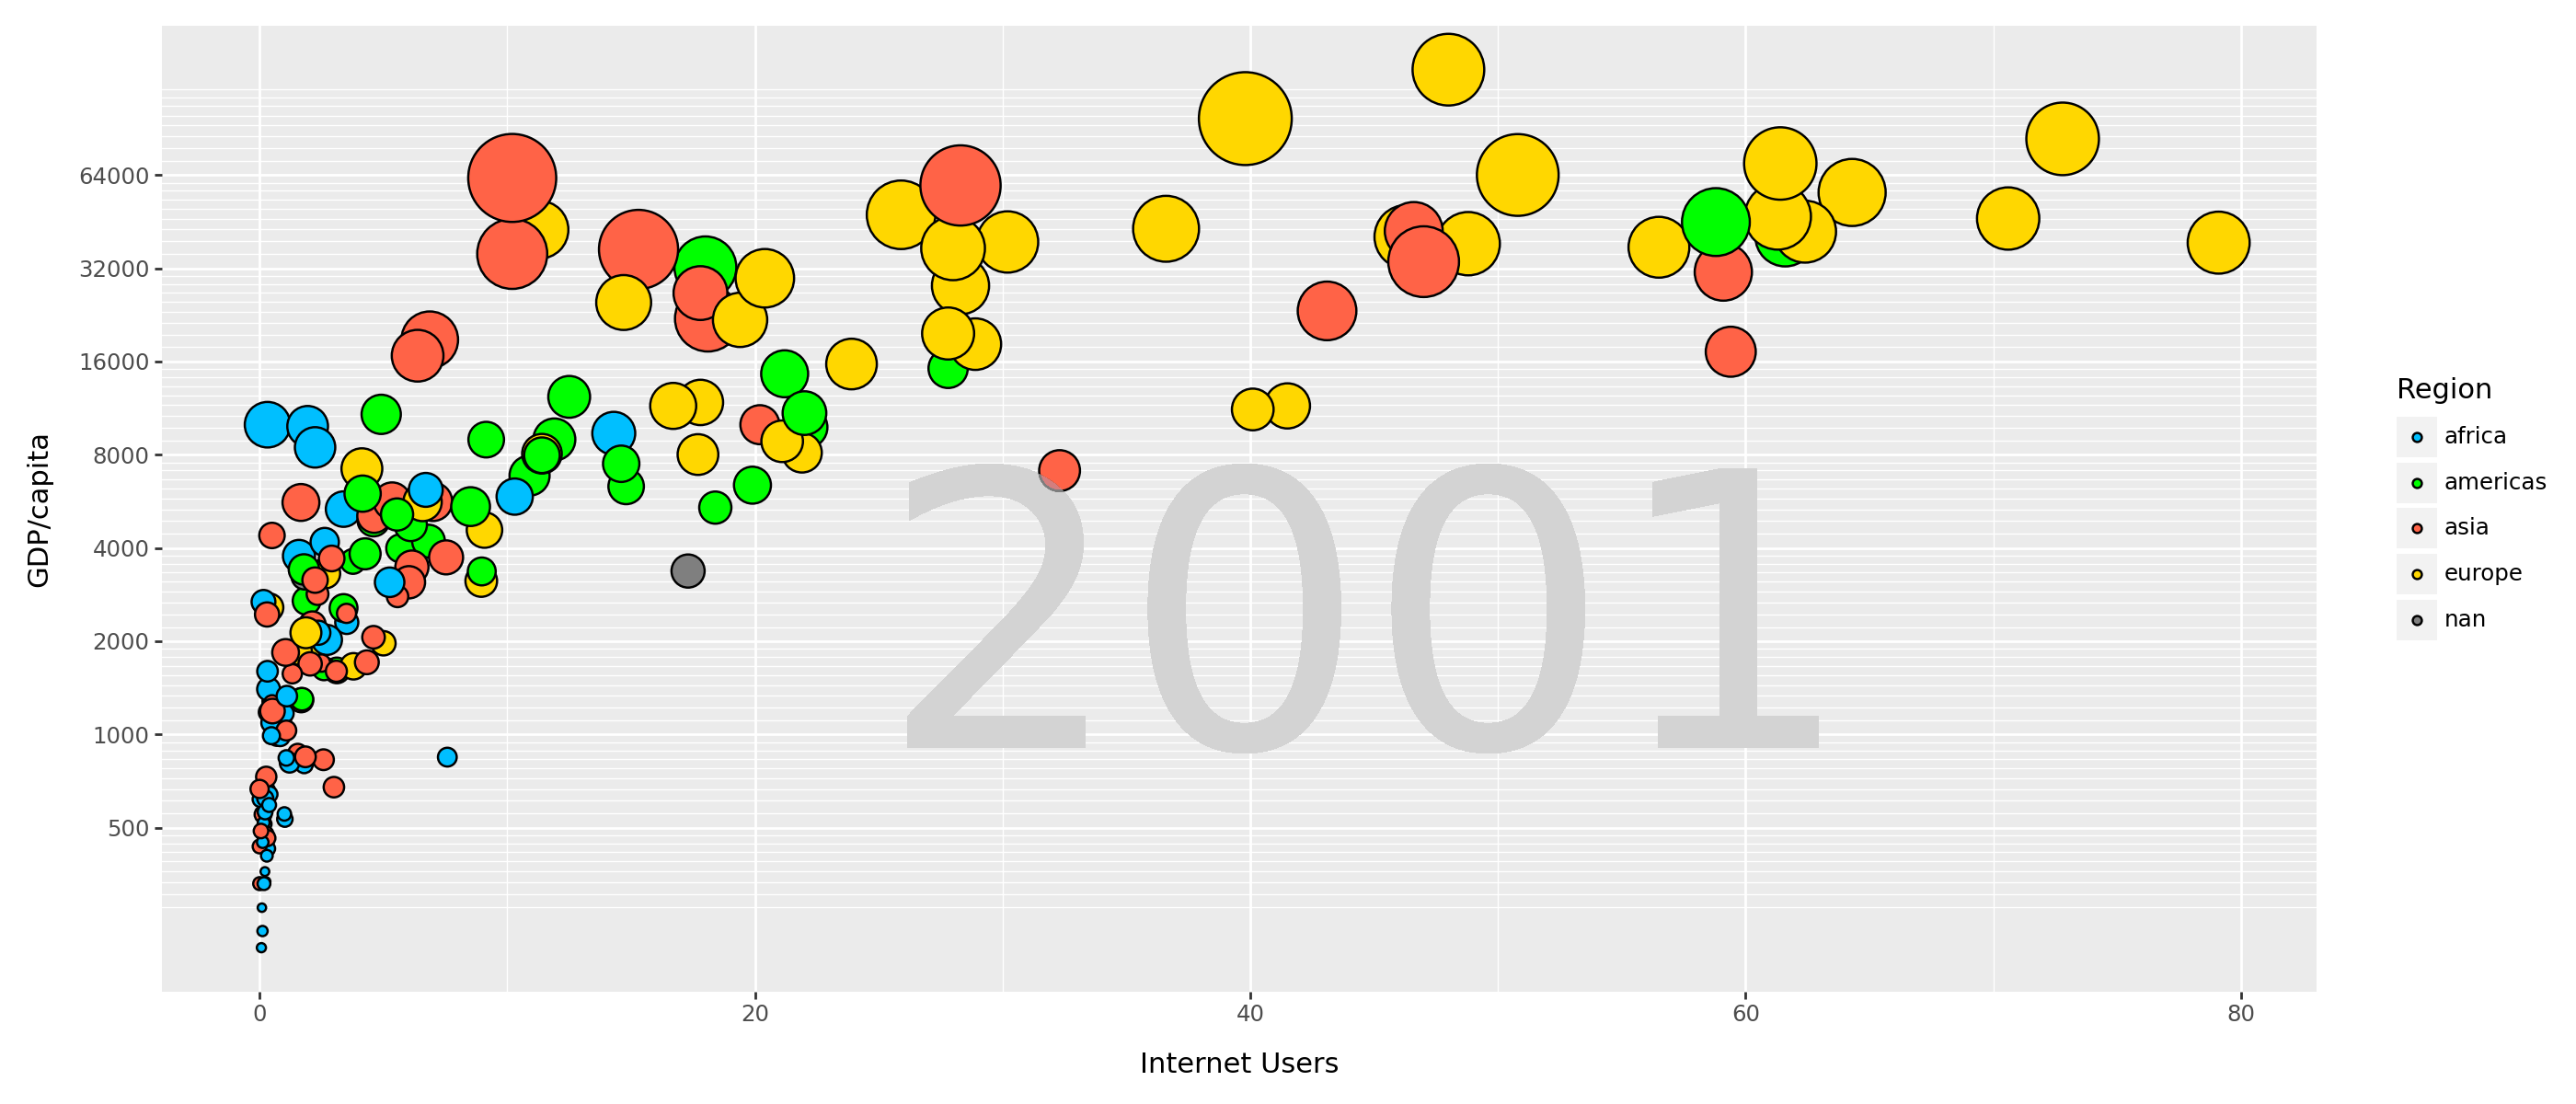

In [58]:
region_color = {'africa':'deepskyblue', 'americas':'lime', 'asia':'tomato', 'europe':'gold'}
(ggplot(q3, aes(x='internet_users', y='gdp', fill='four_regions', size="income")) + geom_point() +
ylim(0,100000) +
scale_y_log10(breaks=(500,1000,2000,4000,8000,16000,32000,64000)) +
geom_text(aes(x=25, y = 500, label = "2001"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
scale_size(range=(1,20)) +
guides(size ='none') +
scale_fill_manual(values=region_color)+
labs(x='Internet Users', y='GDP/capita', fill='Region')+
theme(figure_size=( 14, 6))
) 

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\scales\scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

C:\Users\Evan\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 25 rows containing non-finite values.


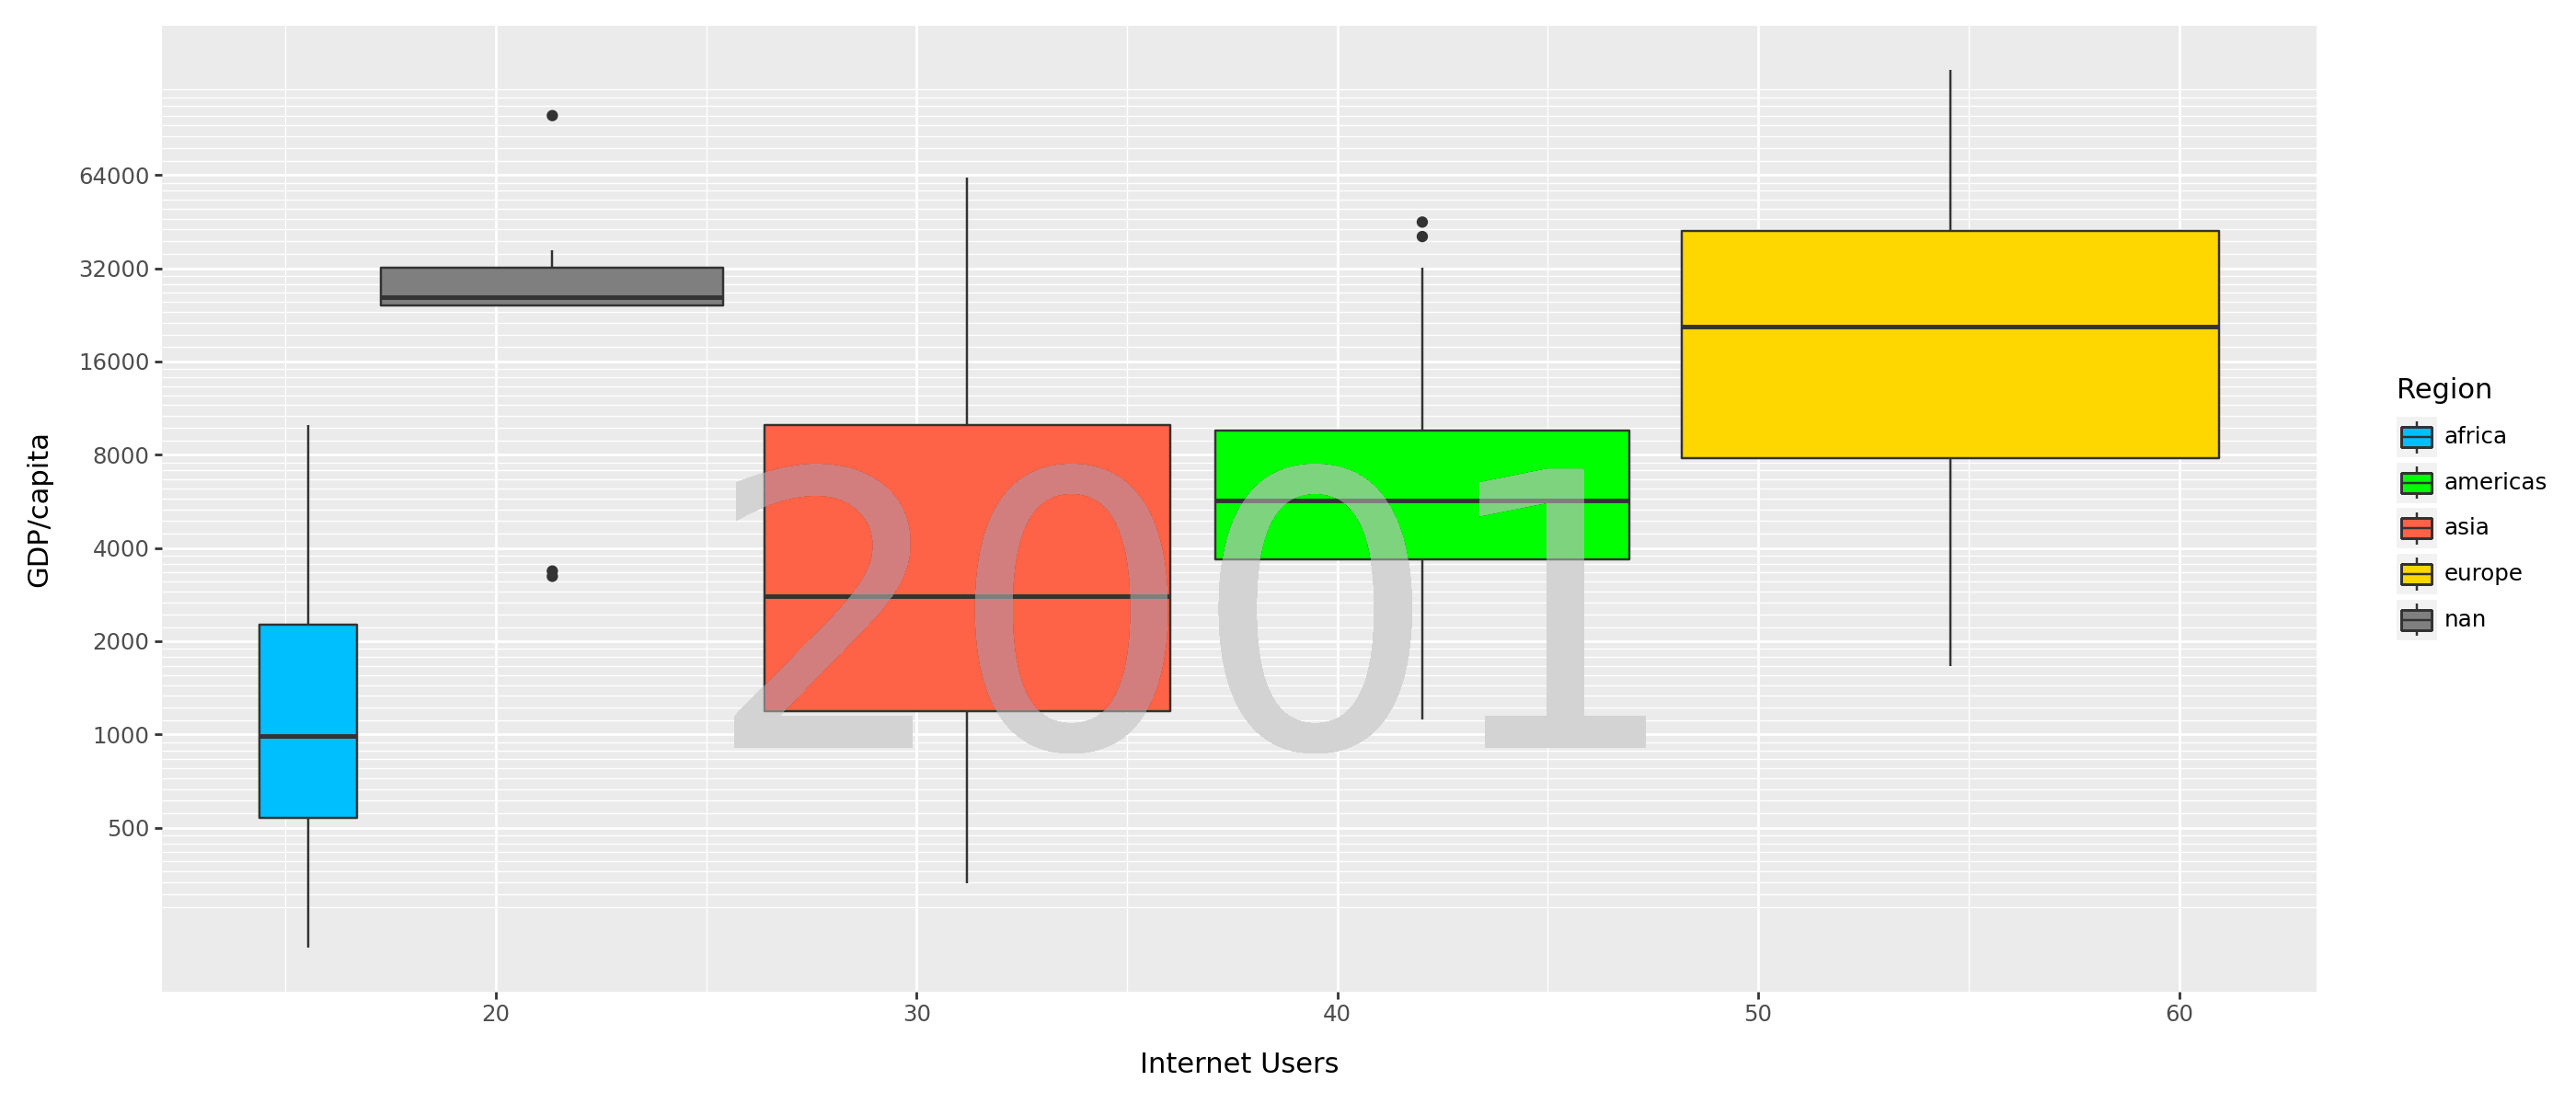

In [59]:
region_color = {'africa':'deepskyblue', 'americas':'lime', 'asia':'tomato', 'europe':'gold'}
(ggplot(q3, aes(x='internet_users', y='gdp', fill='four_regions', size="income")) + geom_boxplot() +
ylim(0,100000) +
scale_y_log10(breaks=(500,1000,2000,4000,8000,16000,32000,64000)) +
geom_text(aes(x=25, y = 500, label = "2001"), size = 150, color = "lightgrey", alpha = .01, ha='left', va="bottom")+
scale_size(range=(1,20)) +
guides(size ='none') +
scale_fill_manual(values=region_color)+
labs(x='Internet Users', y='GDP/capita', fill='Region')+
theme(figure_size=( 14, 6))
)

This works well to describe summary data, but it fails to show outliers and interregion overlap. It also makes it harder to visualize trends of internet users vs geompoint

Chat-GPT 4o was used to suggest how to help improve my visualization ex scaling the Y, X as well as removing a key and adding colors. It was also used to clean the Q2 data to fix a row with 12.4k instead of 12400 for energy. FInally I used chat gpt to debug my errors.

